In [103]:
%%capture cap --no-stderr
from keras.models import Model, load_model
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
import pickle
import pandas as pd
from similarity import Similarity
import matplotlib.gridspec as gridspec

In [ ]:
model = load_model('xception_feature_extractor.h5')

In [105]:
with open('features.pickle', 'rb') as f:
    data = pickle.load(f)

In [106]:
data = data.reset_index()
filenames = data['index']

In [107]:
reverse_search = Similarity()

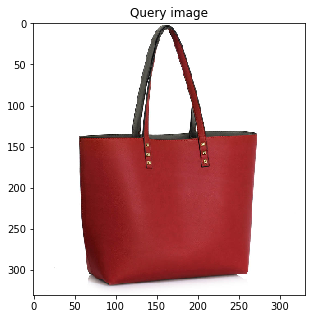

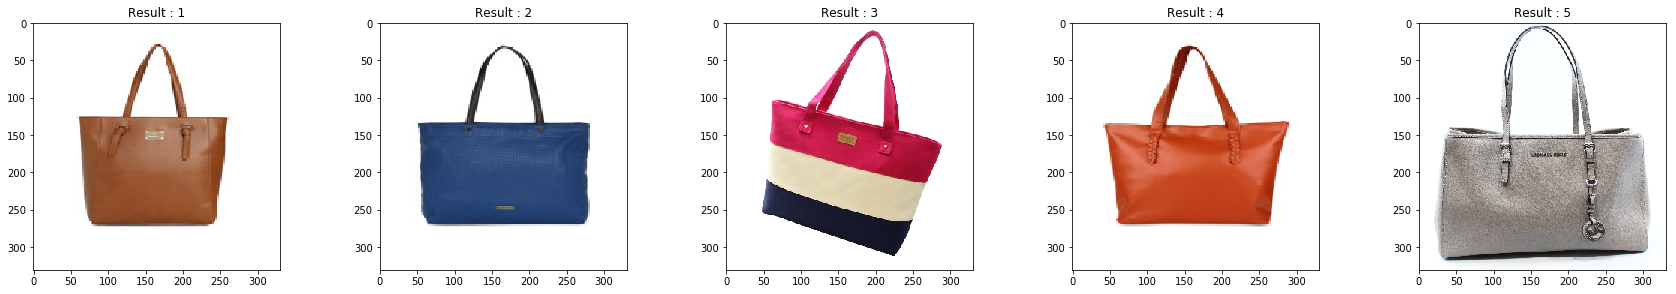

In [113]:
# files = ['test.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg']
files = ['test4.jpg']
for file in files:
    img = image.load_img(f'{file}', target_size=(331, 331))
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(f'Query image')
    ax.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    nq = model.predict(img)
    D, I = reverse_search.index.search(nq, 5)
    I = np.squeeze(I)
    results = [filenames[x] for x in I]

    fig = plt.figure(figsize=(30, 10))
    for i, img in enumerate(results):
        temp = image.load_img(f'../yes_no/dataset/train/yes/{img}', target_size=(331, 331))
        ax = fig.add_subplot(2,5,(i+1))
        ax.set_title(f'Result : {i+1}')
        ax.imshow(temp)